# IPL 2022 INSIGHTS

*The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.*

### Loading the Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator

df = pd.read_csv( 'IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [3]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

##### Check the size of rows and columns of the dataset

In [4]:
print(f"Rows are {df.shape[0]} and columns are {df.shape[1]}")

Rows are 74 and columns are 20


##### Total null values

In [5]:
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

<h1 align="center">Data Exploration and Visualization</h1>

### Basic Questions

##### 1. Which team won the most matches?

In [6]:
match_winners = df['match_winner'].value_counts()
match_winners

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

*IPL 2022 – Most Winning Teams (Seaborn)*

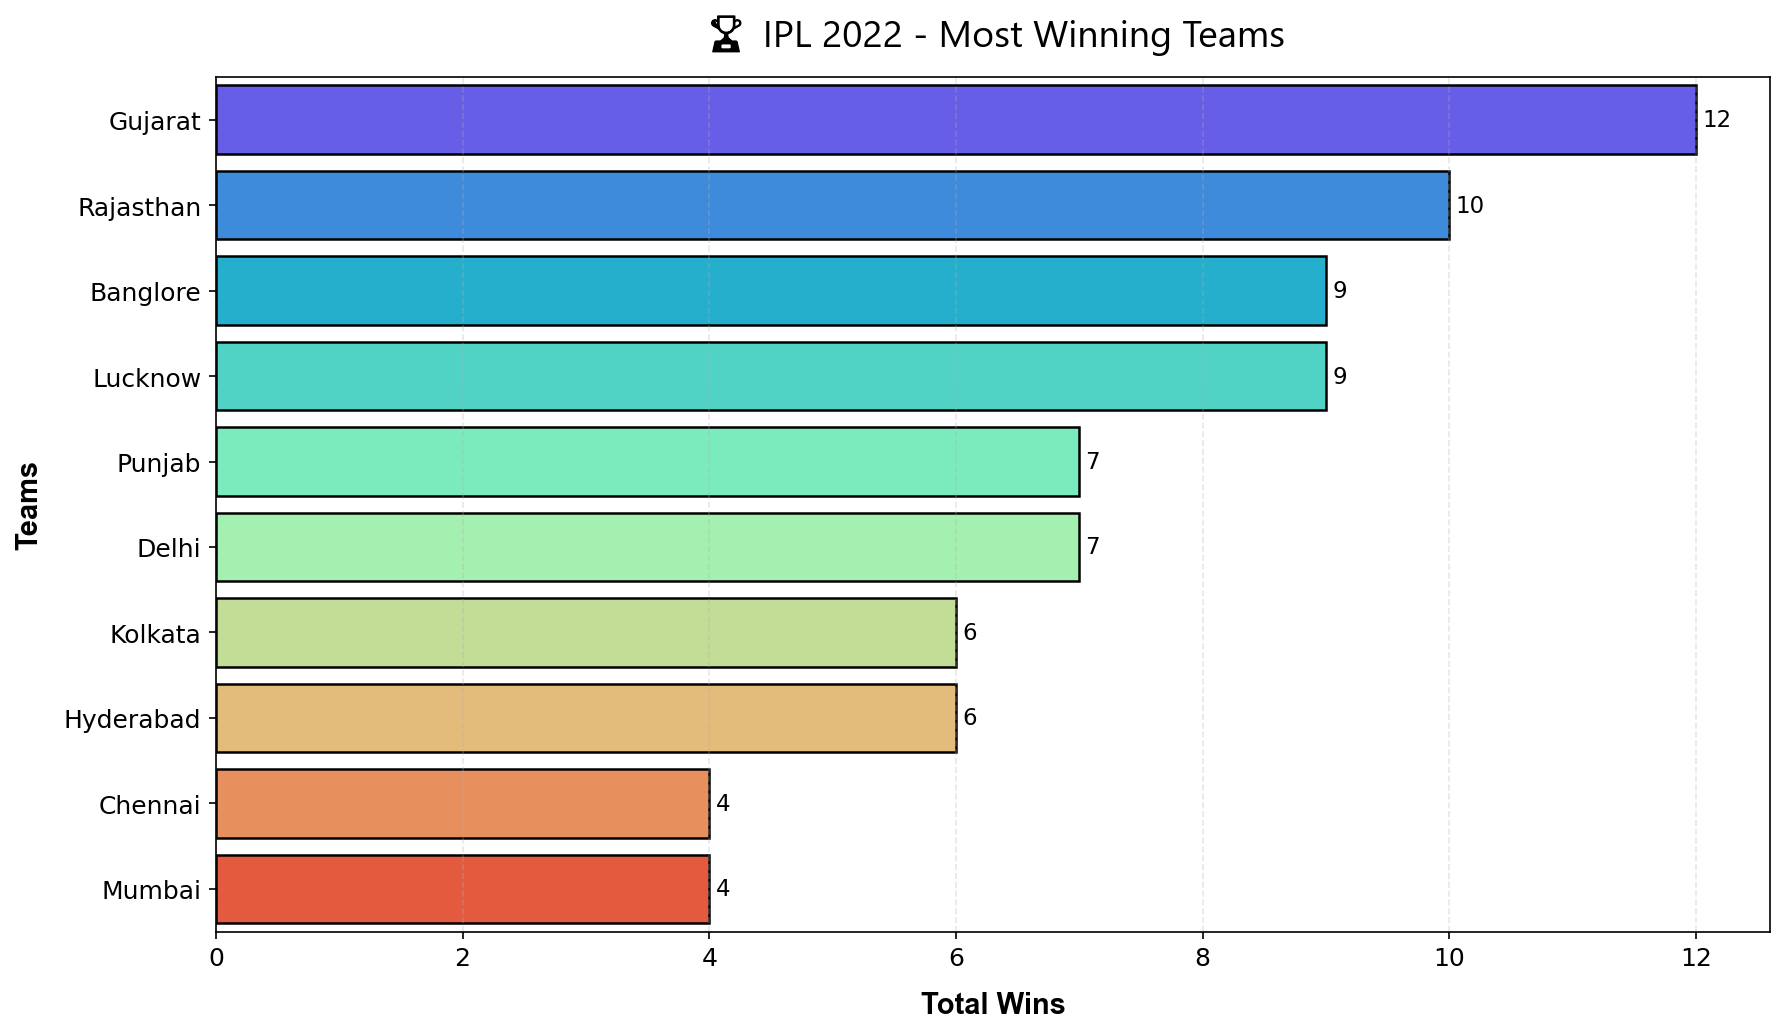

In [7]:
plt.figure(figsize=(12, 7),dpi=150)

x = sns.barplot(
        y=match_winners.index,
        x=match_winners.values,
        palette="rainbow",      
        edgecolor="black",
        linewidth=1.2
    )

for bar in x.containers:
    x.bar_label(bar, fmt='%d', padding=3, fontsize=11, color='black')

plt.title(
    "🏆 IPL 2022 - Most Winning Teams",
    fontsize=18,
    fontweight='bold',
    fontname='Segoe UI Emoji', 
    pad=15
)

plt.xlabel("Total Wins", fontsize=14, fontweight='bold', labelpad=10,font='Arial')
plt.ylabel("Teams", fontsize=14, fontweight='bold', labelpad=10,font='Arial')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

*IPL 2022 - Most Winning Teams (Plotly Interactive)*

In [8]:
df1 = match_winners.reset_index()
df1.columns = ['Team', 'Wins']

fig = px.bar(
    df1,
    x='Wins',
    y='Team',
    orientation='h',           
    text='Wins',              
    color='Wins',             
    color_continuous_scale='plasma', 
    title='🏆 IPL 2022 - Most Winning Teams'
)

fig.update_layout(
    title_font_size=22,
    title_font_family="Segoe UI Emoji",
    xaxis_title="Total Wins",
    yaxis_title="Teams",
)

fig.show()

##### 2. Toss Decision Trends

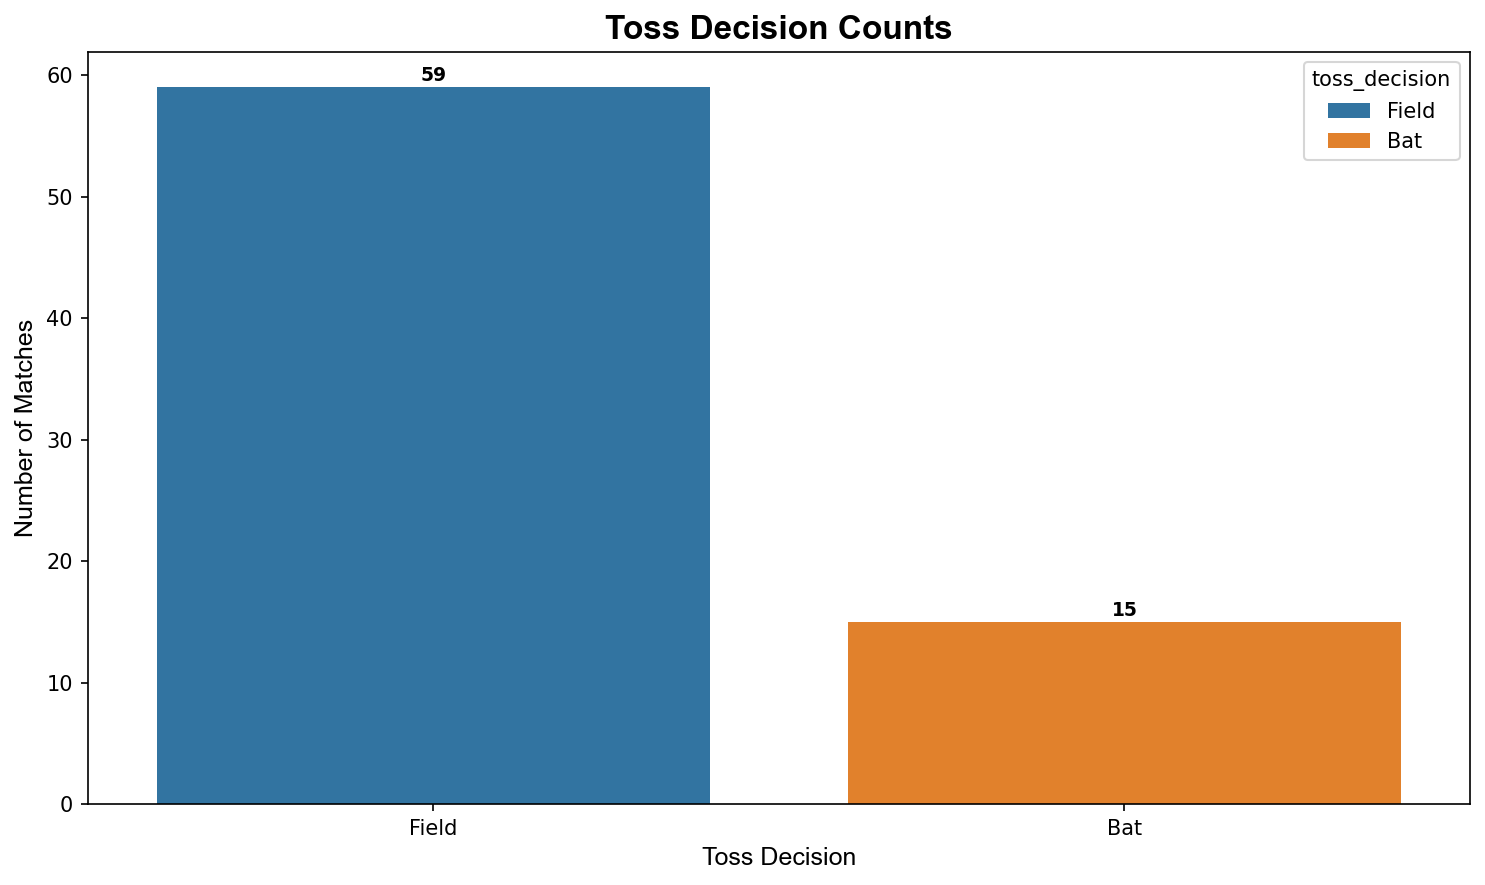

In [9]:
plt.figure(figsize=(10,6),dpi=150)

x = sns.countplot(
        x='toss_decision',
        data=df,
        hue='toss_decision',
        legend=True,
    )

for bar in x.containers:
    x.bar_label(bar, fmt='%d', padding=1, fontsize=9,weight='bold')

plt.title("Toss Decision Counts", fontsize=16, fontname='arial', fontweight='bold')
plt.xlabel("Toss Decision", fontsize=12, fontname='arial')
plt.ylabel("Number of Matches", fontsize=12, fontname='arial')

plt.tight_layout()
plt.show()

##### 3. Toss Winner vs Match Winner

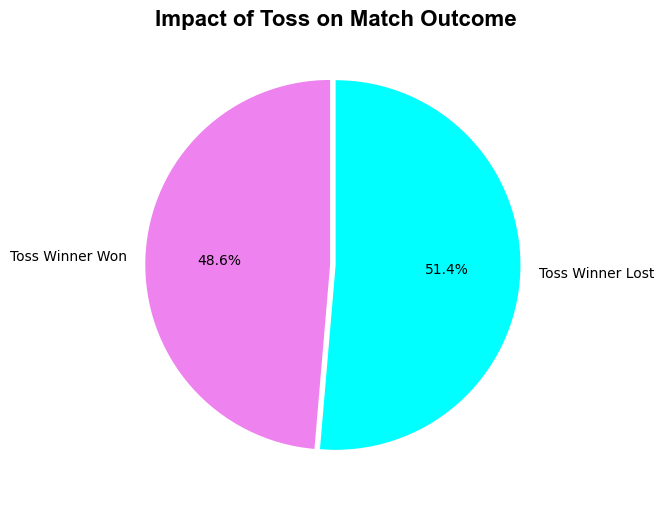

In [10]:
toss_win_match = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
toss_lose_match = df.shape[0] - toss_win_match

labels = ['Toss Winner Won', 'Toss Winner Lost']
sizes = [toss_win_match, toss_lose_match]
colors = ['violet', 'cyan']

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.03,0) 
)
plt.title("Impact of Toss on Match Outcome",font='arial', fontsize=16, fontweight='bold')
plt.show()

##### 4. How do teams win? (Runs vs Wickets)

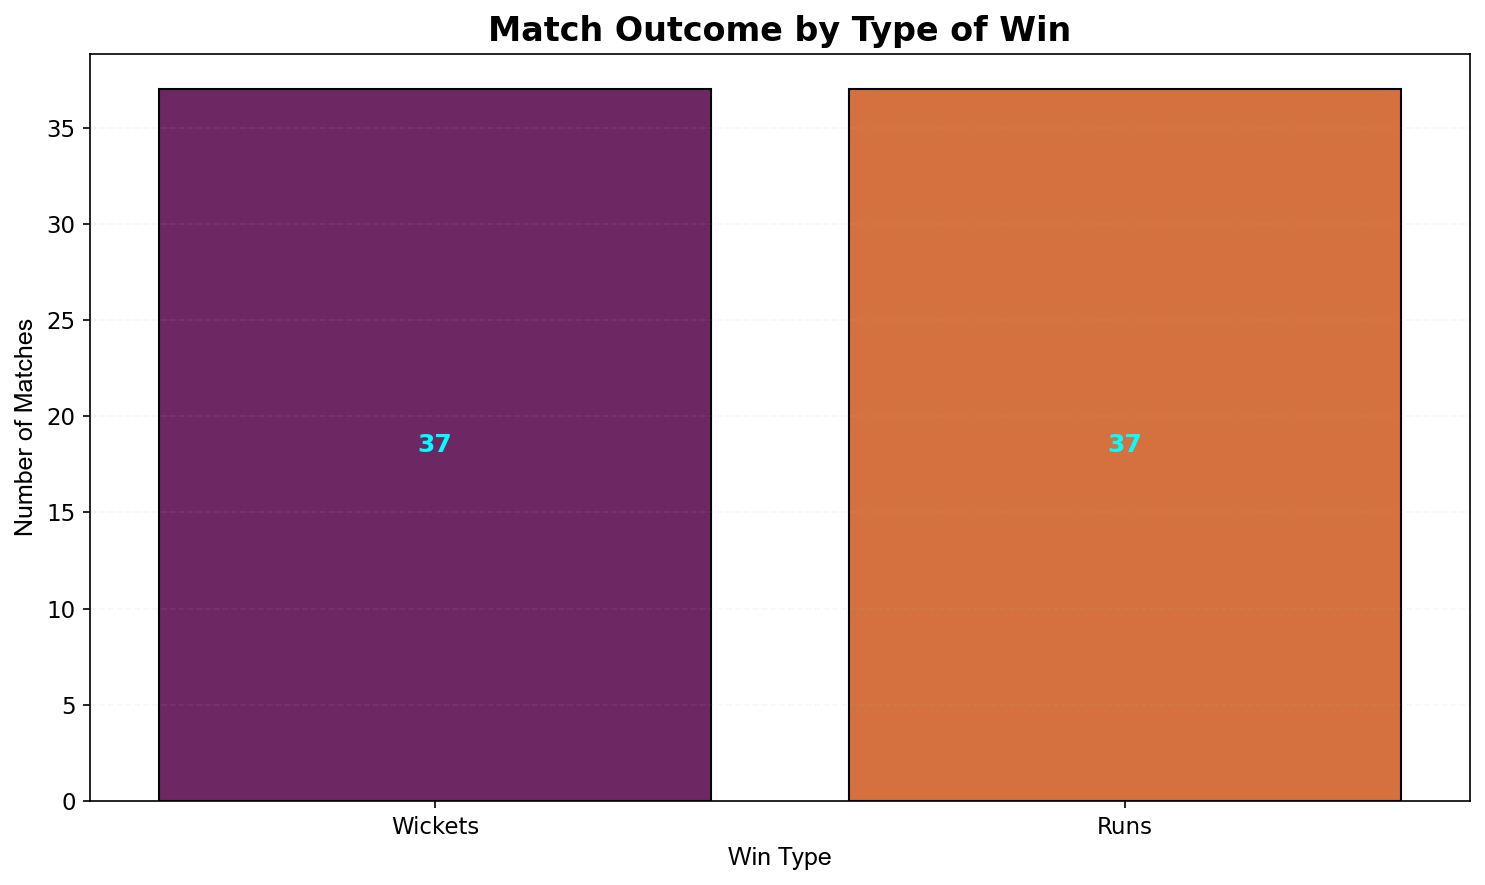

In [11]:
plt.figure(figsize=(10,6), dpi=150)

sns.countplot(
    x='won_by',    
    data=df,
    palette='inferno',
    edgecolor='black',
)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    y_pos = height * 0.5
    
    ax.text(
        x= p.get_x() + p.get_width()/2,
        y= y_pos,
        s= f"{int(height)}",           
        ha= 'center',            
        va= 'center',                
        fontsize= 12,                            
        color= 'cyan',
        weight= 'bold'                
    )

plt.title("Match Outcome by Type of Win", fontsize=16, fontweight='bold')
plt.xlabel("Win Type", fontsize=12, fontname='Arial')
plt.ylabel("Number of Matches", fontsize=12, fontname='Arial')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.1)

plt.tight_layout()
plt.show()

##  Key Player Performances

##### Top 5 most "Player of the Match" Awards

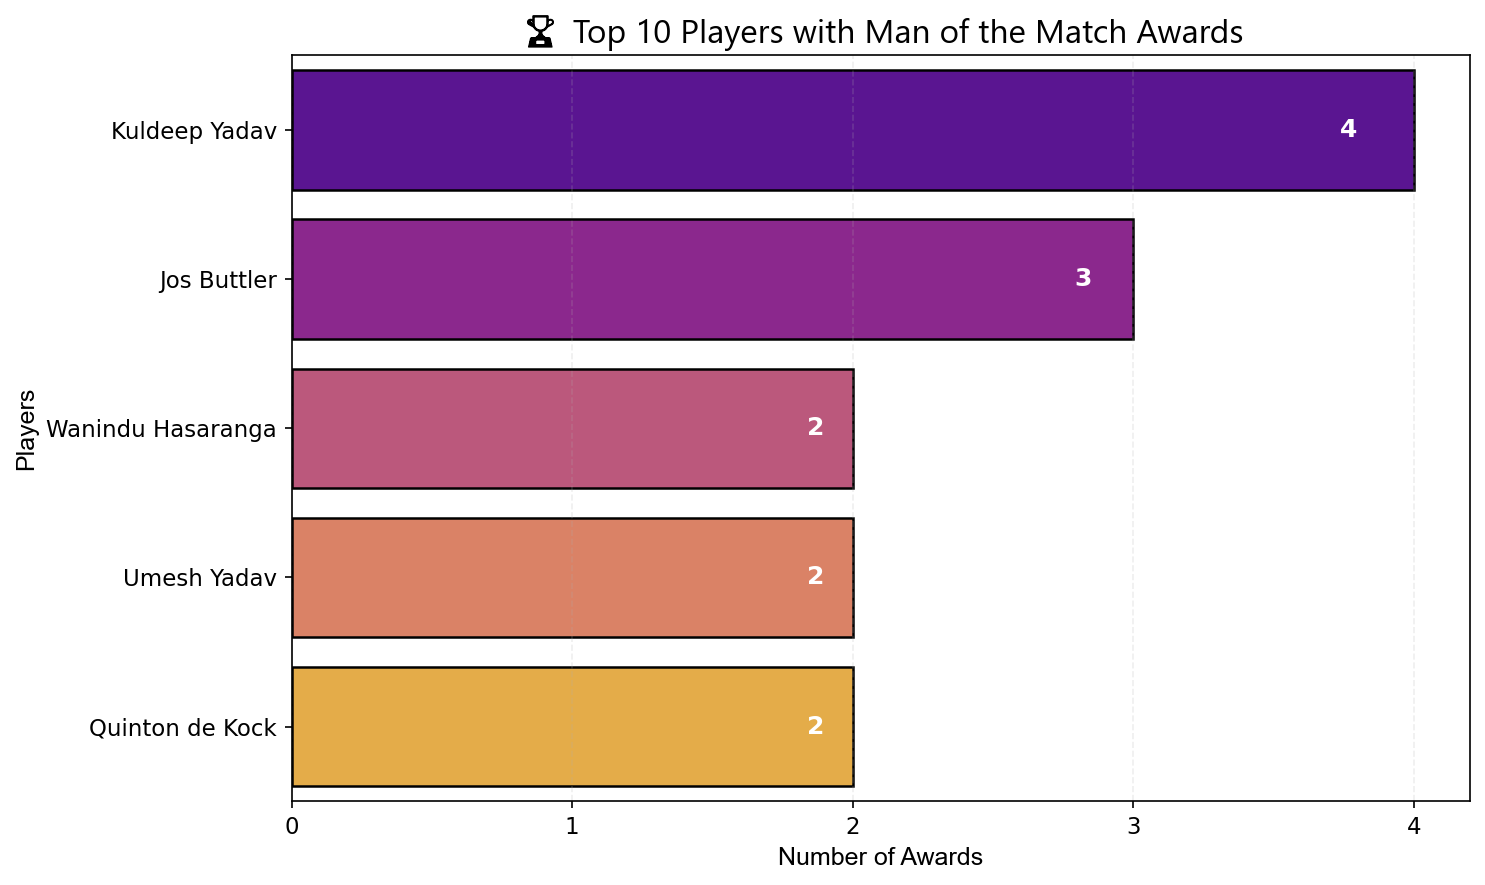

In [12]:
count = df['player_of_the_match'].value_counts().nlargest(5)

plt.figure(figsize=(10,6), dpi=150)

ax = sns.barplot(
        x=count.values,
        y=count.index,
        palette='plasma',        
        edgecolor='black',      
        linewidth=1.2
    )

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - width*0.05,      
        p.get_y() + p.get_height()/2,
        int(width),
        ha='right',            
        va='center',
        fontsize=12,
        fontweight='bold',
        color='white'
    )

plt.title("🏆 Top 10 Players with Man of the Match Awards", fontsize=16, fontweight='bold',fontname='Segoe UI Emoji')
plt.xlabel("Number of Awards", fontsize=12, fontname='Arial')
plt.ylabel("Players", fontsize=12, fontname='Arial')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

##### Top 5 Runs Scorers

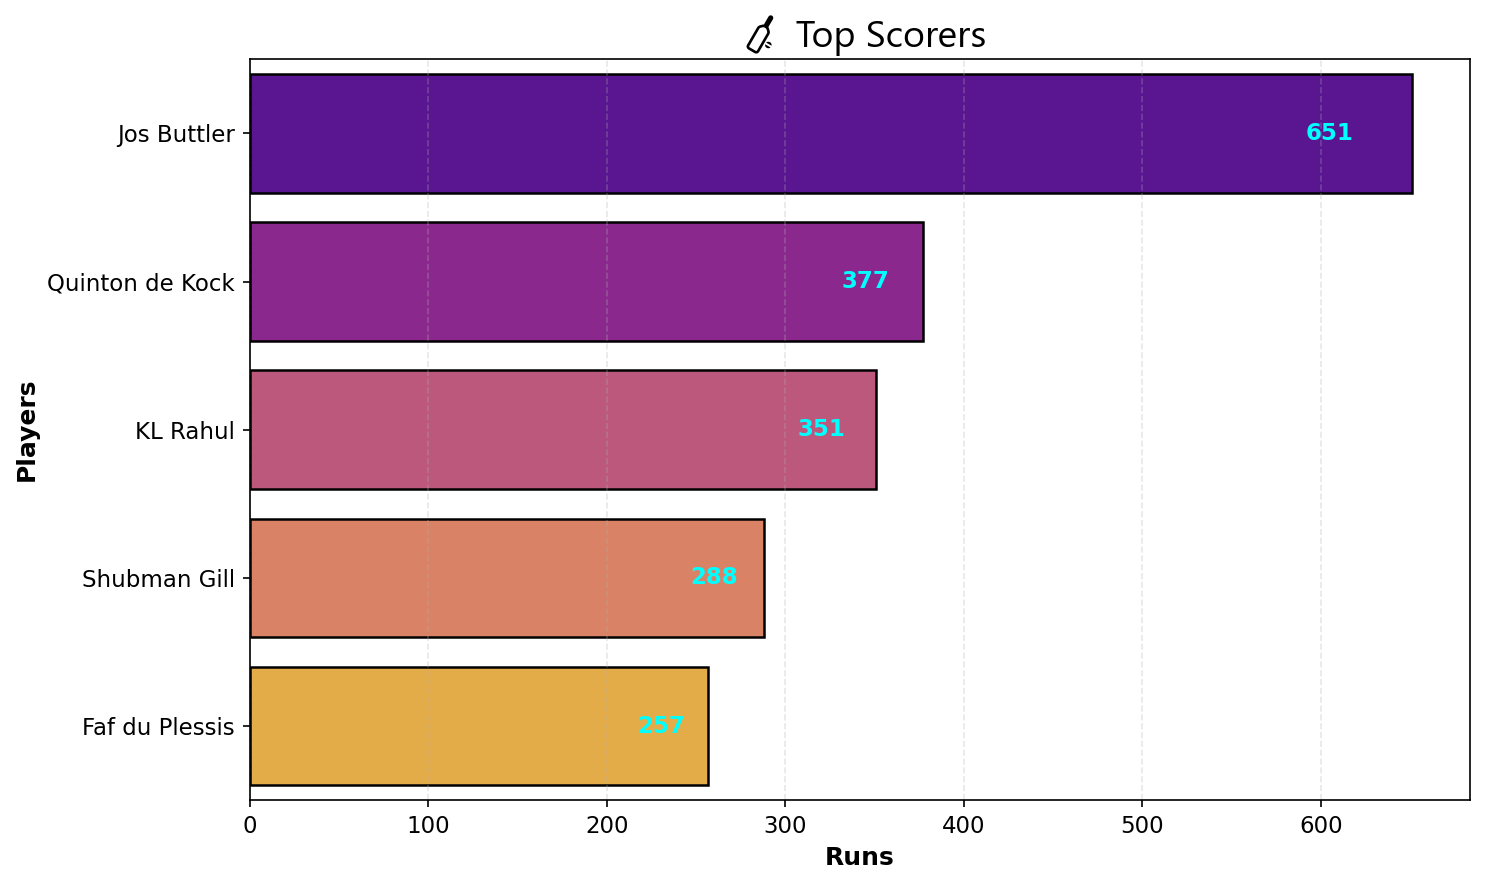

In [13]:
high_scorer = df.groupby('top_scorer')['highscore'].sum().nlargest(5)

plt.figure(figsize=(10,6), dpi=150)
ax = sns.barplot(
        x=high_scorer.values,
        y=high_scorer.index,
        palette='plasma',  
        edgecolor='black',
        linewidth=1.2
    )

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - width*0.05,  
        p.get_y() + p.get_height()/2,
        f"{int(width)}",
        ha='right',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='cyan'
    )

plt.title("🏏 Top Scorers", fontsize=18, fontweight='bold', fontname='Segoe UI Emoji')
plt.xlabel("Runs", fontsize=12, fontweight='bold')
plt.ylabel("Players", fontsize=12, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

##### Top 5 Wicket Takers

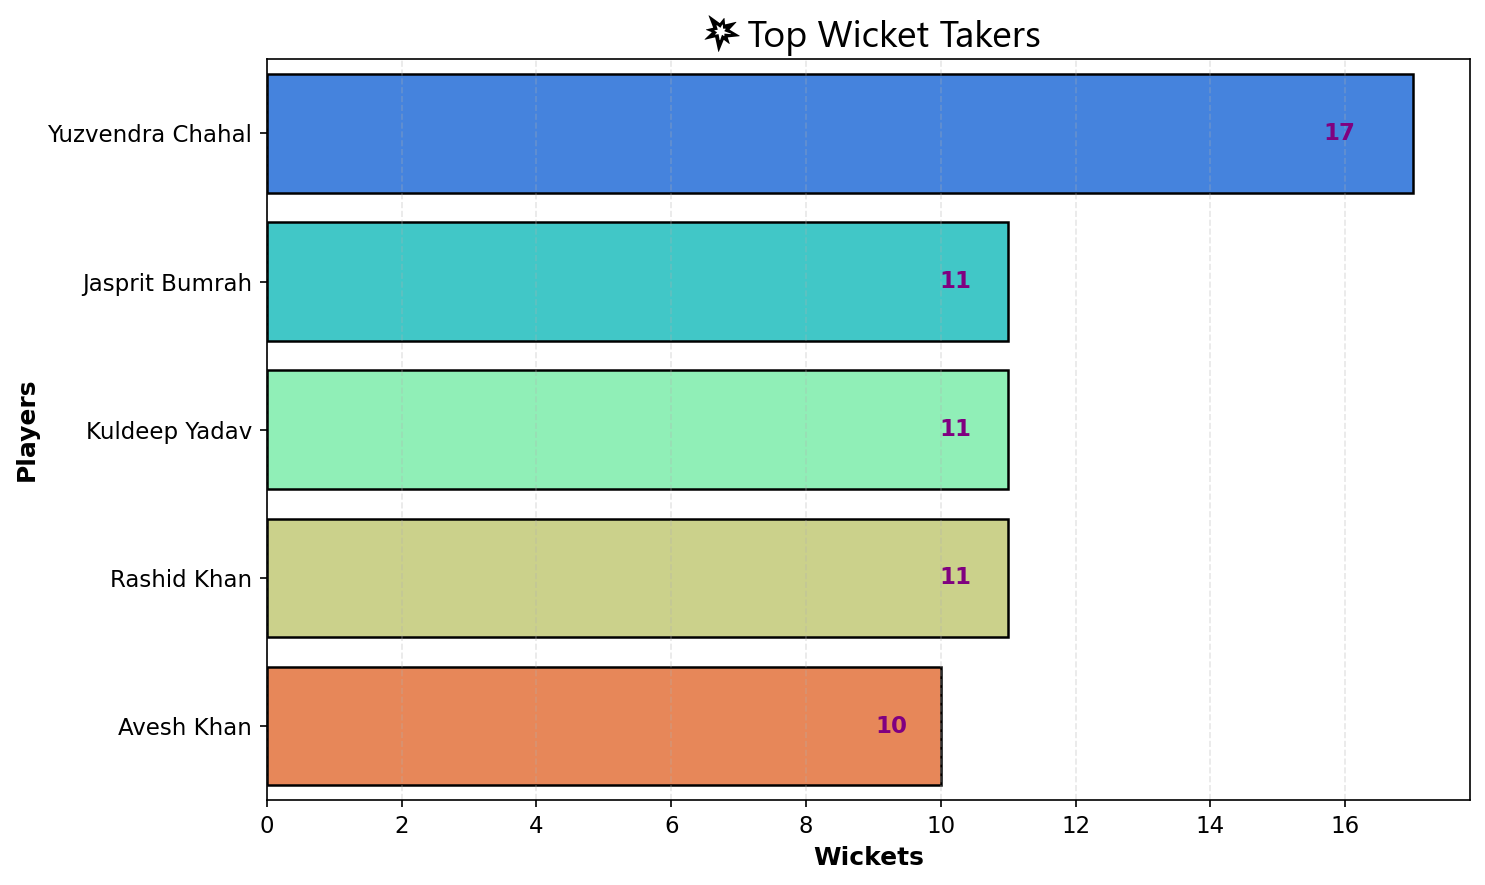

In [14]:
def wick(text):
    wickets = ''
    for i in text:
        if i == '-':
            break
        wickets += i
    return wickets

df['wickets_taken'] = df['best_bowling_figure'].apply(wick).astype(int)
top_wicket_takers = df.groupby('best_bowling')['wickets_taken'].sum().nlargest(5)

plt.figure(figsize=(10,6), dpi=150)
ax = sns.barplot(
        x=top_wicket_takers.values,
        y=top_wicket_takers.index,
        palette='rainbow',  
        edgecolor='black',
        linewidth=1.2
    )

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - width*0.05,  
        p.get_y() + p.get_height()/2,
        f"{int(width)}",
        ha='right',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='purple'
    )

plt.title("💥Top Wicket Takers", fontsize=18, fontweight='bold', fontname='Segoe UI Emoji')
plt.xlabel("Wickets", fontsize=12, fontweight='bold')
plt.ylabel("Players", fontsize=12, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

##  Venue Analysis

##### Most Matches Played by Venue

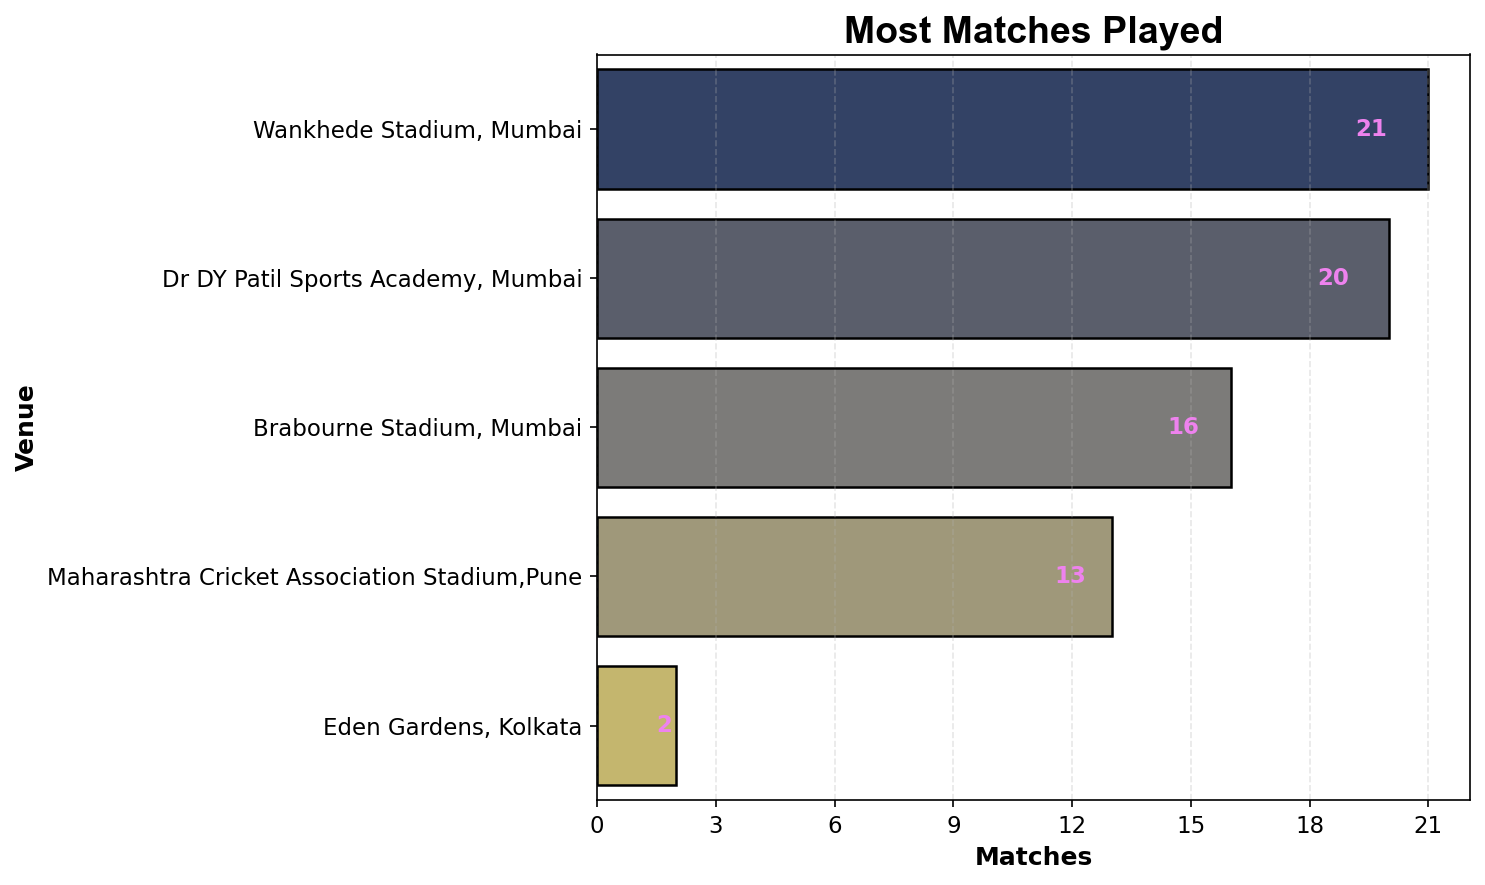

In [15]:
ven = df['venue'].value_counts().head()

plt.figure(figsize=(10,6), dpi=150)
ax = sns.barplot(
        x=ven.values,
        y=ven.index,
        palette='cividis',  
        edgecolor='black',
        linewidth=1.2
    )

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - width*0.05,  
        p.get_y() + p.get_height()/2,
        f"{int(width)}",
        ha='right',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='violet'
    )

plt.title("Most Matches Played", fontsize=18, fontweight='bold', fontname='arial')
plt.xlabel("Matches", fontsize=12, fontweight='bold')
plt.ylabel("Venue", fontsize=12, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Custom Questions and Insights
##### Q1: Who won the highest margin by runs?

In [16]:
highest_margin = df[df['won_by'] == 'Runs'].nlargest(4,'margin')[['match_winner','margin']]
highest_margin

fig = px.bar(
    highest_margin.sort_values('margin'),
    x='margin',
    y='match_winner',
    orientation='h',
    text='margin',
    color='margin',
    color_continuous_scale='plasma',
    title='Top Teams by Winning Margin'
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    texttemplate='%{text}',
    textposition='inside',
    insidetextanchor='middle'
)

fig.update_layout(
    xaxis_title="Margin (Runs)",
    yaxis_title="Match Winner",
    title_font=dict(size=18, family='Arial', color='black', weight='bold'),
    title_font_family="Segoe UI Emoji",
    title_x=0.5,
    width=900,
    height=500,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(autorange='reversed')
)

fig.show()

##### Q2: Which player had the highest individual score?

In [17]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


##### Q3: Which bowler had the best bowling figures?

In [18]:
df['lowest_runs_conceded'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[-1]).astype(int)
df.sort_values(by=['wickets_taken', 'lowest_runs_conceded'], ascending=[False, True])[['best_bowling','best_bowling_figure']].head(1)

,best_bowling,best_bowling_figure
55,Jasprit Bumrah,5--10
